# bounding box

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

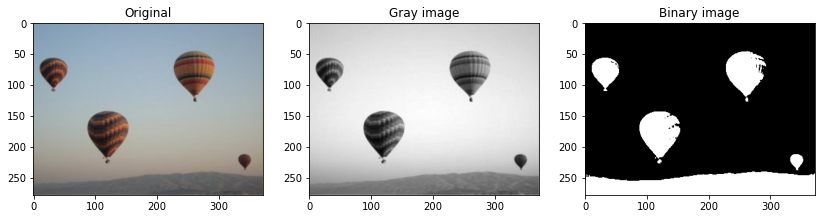

In [2]:
input_image = cv2.imread("images/balloon.png")            

gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)         

_, binary_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(gray_image, cmap='gray');plt.title("Gray image");
plt.subplot(133);plt.imshow(binary_image, cmap='gray');plt.title("Binary image");

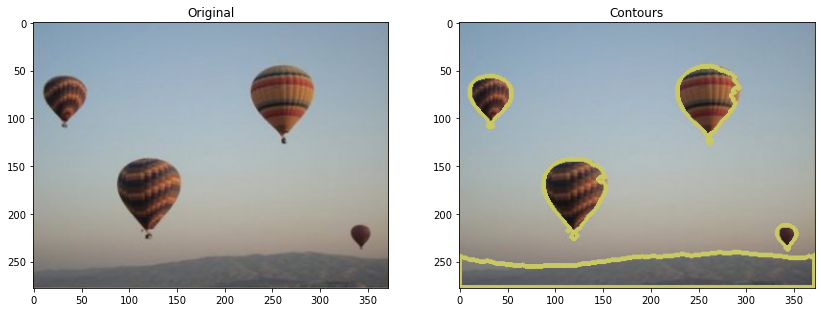

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_contours = cv2.drawContours(input_image.copy(), contours, -1, (100,200,200), 3)
plt.figure(figsize=[14,8])

plt.subplot(121);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(all_contours[...,::-1]);plt.title("Contours");


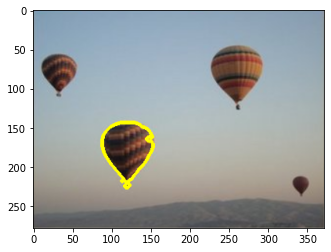

In [4]:
drawing = input_image.copy()
cv2.drawContours(drawing, [contours[2]], -1, (0,255,255),3)
plt.imshow(drawing[...,::-1])

In [8]:
boundRect = cv2.boundingRect(contours[3])
centers, radius = cv2.minEnclosingCircle(contours[3])

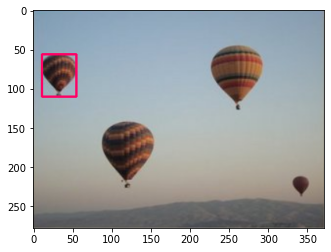

In [11]:
drawing = input_image.copy()

cv2.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (100,0,255), 2)
plt.imshow(drawing[...,::-1])

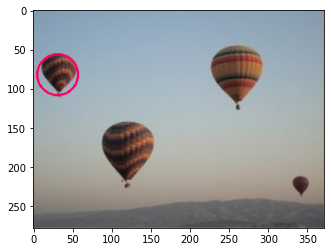

In [13]:
drawing = input_image.copy()
cv2.circle(drawing, (int(centers[0]), int(centers[1])), int(radius), (100,0,255), 2)
plt.imshow(drawing[...,::-1])

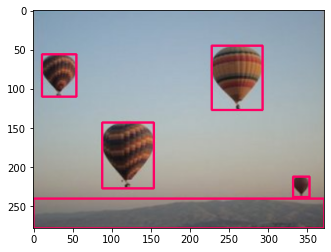

In [14]:
input_image = cv2.imread("images/balloon.png")            

gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)         

_, binary_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

drawing = input_image.copy()

for c in contours:
    boundRect = cv2.boundingRect(c)
    cv2.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (100,0,255), 2)

plt.imshow(drawing[...,::-1])

https://docs.opencv.org/4.6.0/da/d0c/tutorial_bounding_rects_circles.html